# Import data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)
input_path = "2017_2018_2019_merged.csv"
main_data = pd.read_csv(input_path) 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (3690, 52)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [12]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (2583, 51)
Testing shape:  (1107, 51)


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.104576,0.169218,0.039954,0.039926,0.028599,-0.119837,0.000693,0.059141,0.045652,0.000317,...,0.087317,-0.020159,0.192091,-0.009137,-0.016856,0.054146,0.039799,0.097402,0.083086,0.000623
std,3.351245,6.527943,1.346680,2.301105,3.212774,4.930630,0.035950,2.686174,2.348888,0.040516,...,3.279896,2.421643,6.848288,1.442044,1.454028,2.028213,1.652121,3.556078,3.081653,0.033965
min,-12.710000,-23.930000,-5.430000,-9.670000,-24.700000,-35.330000,-0.220000,-16.000000,-10.000000,-0.320000,...,-10.000000,-8.170000,-48.000000,-9.000000,-9.700000,-13.000000,-10.100000,-25.000000,-27.400000,-0.220000
25%,-1.855000,-3.870000,-0.720000,-1.305000,-1.765000,-3.170000,-0.020000,-1.630000,-1.370000,-0.020000,...,-2.125000,-1.570000,-4.235000,-0.920000,-0.920000,-1.150000,-0.965000,-2.025000,-1.750000,-0.020000
50%,0.130000,0.240000,0.020000,0.060000,0.070000,-0.070000,0.000000,0.070000,0.040000,0.000000,...,0.000000,0.010000,0.100000,0.000000,0.000000,0.020000,0.030000,0.120000,0.070000,0.000000
75%,2.020000,4.170000,0.770000,1.315000,1.770000,2.930000,0.020000,1.745000,1.475000,0.020000,...,2.305000,1.560000,4.640000,0.900000,0.900000,1.310000,1.035000,2.290000,1.880000,0.020000
max,14.000000,33.000000,10.000000,16.050000,24.500000,48.600000,0.270000,22.000000,9.000000,0.350000,...,11.000000,10.000000,28.000000,10.000000,10.100000,13.000000,11.600000,29.000000,34.200000,0.200000


,ttl_pts
count,2583.000000
mean,215.385985
std,20.488819
min,155.000000
25%,201.000000
50%,215.000000
75%,229.000000
max,301.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

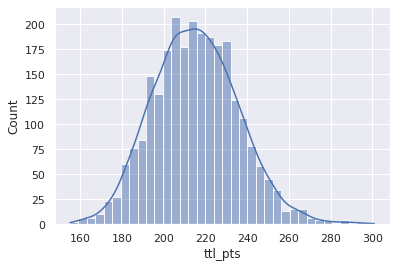

<AxesSubplot:xlabel='ttl_pts'>

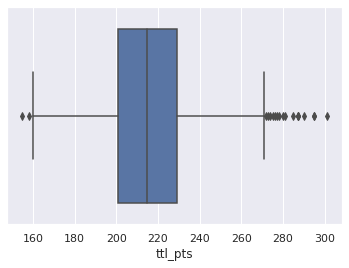

In [78]:
display(init_train.describe())
display(init_train_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

## Removing Outliers

,ttl_pts
count,2564.000000
mean,214.982839
std,19.726527
min,160.000000
25%,201.000000
50%,215.000000
75%,229.000000
max,271.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

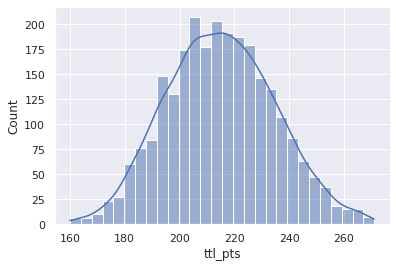

<AxesSubplot:xlabel='ttl_pts'>

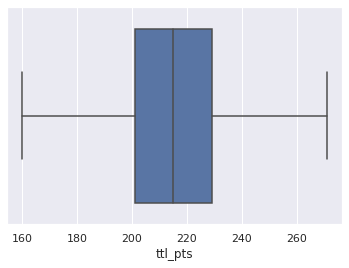

In [93]:
def remove_outliers_by_iqr(data, labels):
    lower = labels.quantile(.25)
    upper = labels.quantile(.75)
    diff = upper - lower
    
    lower_bound = lower - 1.5 * diff
    upper_bound = upper + 1.5 * diff
    valid = (labels >= lower_bound) & (labels <= upper_bound)
    rows_to_select = valid.to_numpy()[:, 0]
    return data.loc[rows_to_select], labels.loc[rows_to_select]
    
init_train, init_train_label = remove_outliers_by_iqr(init_train, init_train_label)
display(init_train_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [94]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,...,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03,2.564000e+03
mean,-1.108491e-17,-2.771228e-18,1.108491e-17,5.542455e-18,2.771228e-18,-1.801298e-17,5.542455e-18,-2.078421e-17,-6.928069e-18,-5.542455e-18,...,2.771228e-18,9.699296e-18,1.558815e-17,-5.022850e-18,3.464034e-19,1.247052e-17,-1.801298e-17,3.464034e-18,2.632666e-17,-1.108491e-17
std,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,...,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00
min,-3.818674e+00,-3.688194e+00,-4.061592e+00,-4.223280e+00,-7.723999e+00,-7.142676e+00,-6.134283e+00,-5.978445e+00,-4.277231e+00,-7.944353e+00,...,-3.074866e+00,-3.367530e+00,-7.032305e+00,-6.249073e+00,-6.672059e+00,-6.428138e+00,-6.130215e+00,-7.056485e+00,-8.916864e+00,-6.490513e+00
25%,-5.831741e-01,-6.173277e-01,-5.635281e-01,-5.821932e-01,-5.573412e-01,-6.177811e-01,-5.753025e-01,-6.289335e-01,-5.996146e-01,-5.054979e-01,...,-6.752690e-01,-6.369158e-01,-6.462262e-01,-6.271829e-01,-6.181984e-01,-5.951539e-01,-6.054289e-01,-5.942016e-01,-5.960985e-01,-6.070478e-01
50%,7.604496e-03,1.016048e-02,-1.393845e-02,1.069367e-02,1.364805e-02,1.172951e-02,-1.940440e-02,3.924510e-03,-2.467625e-03,-9.574190e-03,...,-2.582292e-02,1.165680e-02,-1.261568e-02,5.192917e-03,1.043855e-02,-8.039870e-03,-3.988886e-03,8.101434e-03,-2.453215e-03,-1.870134e-02
75%,5.708183e-01,6.123961e-01,5.430781e-01,5.546265e-01,5.463631e-01,6.189206e-01,5.364937e-01,6.265451e-01,6.063881e-01,4.863495e-01,...,6.823173e-01,6.519673e-01,6.501767e-01,6.236704e-01,6.252972e-01,6.221538e-01,6.034958e-01,6.160269e-01,5.847041e-01,5.696451e-01
max,4.140819e+00,5.024709e+00,7.398095e+00,6.968683e+00,7.648189e+00,9.887081e+00,7.485220e+00,8.167793e+00,3.812460e+00,8.669090e+00,...,3.328124e+00,4.138561e+00,4.056791e+00,6.954378e+00,6.968503e+00,6.372672e+00,6.986618e+00,8.124082e+00,1.106595e+01,5.864764e+00


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
3176,-1.115843,-0.777261,-1.053703,-1.038009,-1.606368,0.533194,-1.131201,-0.874631,-0.760344,-1.745307,...,0.090041,-0.260992,-0.874939,1.096215,1.030036,-0.032657,-0.091636,-1.588669,-1.903416,-0.901221
3415,-0.552629,0.212946,0.090038,-0.019767,0.943165,-1.148883,-0.575302,-1.481430,0.742635,-0.009574,...,-0.772838,-0.161847,-0.864725,0.463839,0.602907,0.302134,0.591407,-0.362979,0.052694,-0.018701
1235,-1.223122,-1.265477,2.941963,3.987931,2.117951,-0.948008,-2.242997,-0.394404,-3.851457,-3.976964,...,-0.025823,-3.297303,0.700880,1.395030,1.319381,-3.966444,-4.316828,1.096042,1.269180,-1.195394
2610,-0.308272,0.650658,-1.387913,-1.151147,2.667850,0.843637,-0.853252,-1.663843,-1.126509,-0.753460,...,0.504711,0.420629,-1.306830,-0.238029,-0.292685,1.872695,2.308080,-0.534463,0.493873,-0.312875
1459,0.406920,-0.018153,-0.162476,0.110777,-2.371853,2.369477,0.814443,0.942043,0.027336,1.478197,...,0.769977,0.651967,0.177066,0.491636,0.354897,1.119416,1.220047,-1.743286,-1.822317,0.275472


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

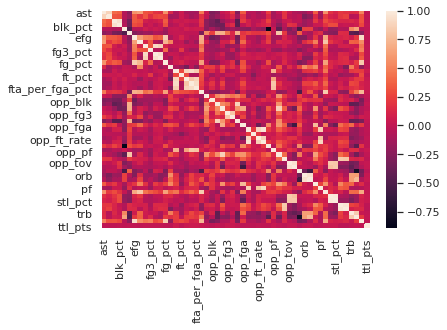

In [95]:
def plot_correlation_heatmap(input, labels, ax=None, annot=False):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax, annot=annot)
plot_correlation_heatmap(scaled_train, init_train_label)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,fg3a_per_fga_pct,ft,ft_rt,fta,fta_per_fga_pct,off_rtg,opp_efg_pct,opp_fg3,opp_fg3a,opp_pf,opp_tov,opp_tov_pct,opp_trb,orb,orb_pct,pts,stl,stl_pct,to_pct,trb_pct
3176,0.409666,0.183294,0.247298,0.630911,0.770333,-1.276803,1.373842,0.263284,-0.240712,0.846438,1.938124,1.708086,1.464988,-0.400608,-0.780064,-0.874939,1.096215,1.030036,-0.091636,-1.903416
3415,0.968083,0.096288,0.492683,0.360492,0.182496,-0.616453,-0.322945,-1.267183,-1.434645,0.502962,0.341919,0.589841,-0.515843,-0.561414,-0.543823,-0.864725,0.463839,0.602907,0.591407,0.052694
1235,-2.103211,5.145884,3.928063,4.921209,3.709521,0.813727,2.731272,5.907698,3.732398,3.649198,4.219171,4.167053,-1.237857,2.503951,1.658637,0.700880,1.395030,1.319381,-4.316828,1.269180
2610,-0.427960,0.843899,1.228836,0.402095,0.966279,-1.671275,1.713199,-0.083360,0.601896,0.512122,-0.543106,-0.300071,-1.250414,-1.264940,-1.033532,-1.306830,-0.238029,-0.292685,2.308080,0.493873
1459,-0.427960,-1.263590,-0.979623,-1.381629,-0.797234,-0.270638,1.373842,1.970343,2.018620,-0.628217,0.362991,-0.095157,1.132234,-0.832774,-0.802212,0.177066,0.491636,0.354897,1.220047,-1.822317


,ast,ast_pct,def_rtg,fg3,fga,ft_pct,fta_per_fga_pct,off_rtg,opp_ast,opp_fg,opp_fg_pct,opp_ft_rate,opp_pf,opp_tov,opp_tov_pct,orb_pct,pts,stl,stl_pct,trb_pct
3176,-1.115843,-0.777261,0.533194,-0.760344,0.022926,-1.243020,0.770333,-1.276803,0.627256,0.620881,1.144424,0.983872,0.846438,1.938124,1.708086,-0.780064,-0.874939,1.096215,1.030036,-1.903416
3415,-0.552629,0.212946,-1.148883,0.742635,-1.481194,-0.517194,0.182496,-0.616453,-1.951168,-0.938741,0.012799,-0.242620,0.502962,0.341919,0.589841,-0.543823,-0.864725,0.463839,0.602907,0.052694
1235,-1.223122,-1.265477,-0.948008,-3.851457,1.168506,0.934459,3.709521,0.813727,1.667601,0.365205,1.144424,-3.922095,3.649198,4.219171,4.167053,1.658637,0.700880,1.395030,1.319381,1.269180
2610,-0.308272,0.650658,0.843637,-1.126509,-2.177870,1.478828,0.966279,-1.671275,3.079206,1.227198,2.276048,-0.487918,0.512122,-0.543106,-0.300071,-1.033532,-1.306830,-0.238029,-0.292685,0.493873
1459,0.406920,-0.018153,2.369477,0.027336,0.215314,0.390089,-0.797234,-0.270638,1.785914,1.490179,1.144424,0.738574,-0.628217,0.362991,-0.095157,-0.802212,0.177066,0.491636,0.354897,-1.822317


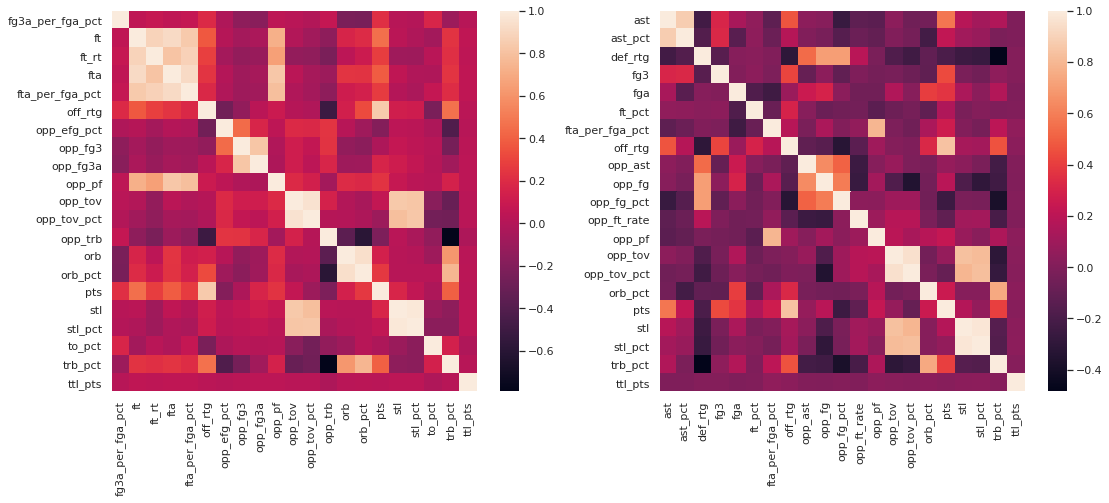

In [110]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [111]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

"Column diff {'opp_fg', 'opp_fg3a', 'opp_ast', 'fga', 'ast_pct', 'opp_fg_pct', 'opp_ft_rate', 'ft_rt', 'opp_trb', 'fg3', 'fta', 'opp_efg_pct', 'def_rtg', 'orb', 'ft_pct', 'ast', 'opp_fg3', 'to_pct', 'fg3a_per_fga_pct', 'ft'}"

## Removing redundant features
- Removing ft, ft_rt, fta (in favor of only fa_per_fga_pct)
- Removing orb in favor of only orb_pct)
- Removing stl (in favor of stl_pct)
- Removing opp_fg3a (in favor of opp_fg3)
- Removing opp_tov (in favor of opp_tov_pct)

Columns before removal: {'pts', 'opp_pf', 'opp_tov', 'trb_pct', 'stl_pct', 'fta', 'opp_efg_pct', 'orb', 'stl', 'opp_fg3', 'to_pct', 'fg3a_per_fga_pct', 'ft', 'orb_pct', 'fta_per_fga_pct', 'opp_fg3a', 'ft_rt', 'opp_trb', 'opp_tov_pct', 'off_rtg'}
Columns after removal: {'pts', 'stl_pct', 'fta_per_fga_pct', 'trb_pct', 'opp_efg_pct', 'orb', 'opp_pf', 'off_rtg', 'opp_fg3', 'to_pct', 'opp_trb', 'opp_tov_pct', 'fg3a_per_fga_pct'}


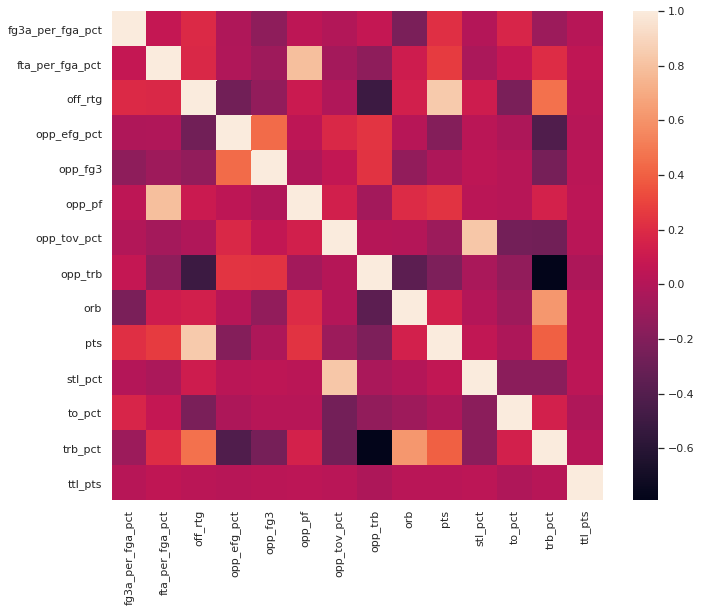

In [112]:
print(f"Columns before removal: {set(f_regression_select.columns)}")
f_regression_select = f_regression_select.drop(labels=['ft', 'ft_rt', 'fta', 'orb_pct', 'stl', 'opp_fg3a', 'opp_tov'], axis=1)
print(f"Columns after removal: {set(f_regression_select.columns)}")
figure = plt.figure(figsize = (11,9))
plot_correlation_heatmap(f_regression_select, init_train_label, ax=figure.gca())

## Looking at the relationship between some features and our target label

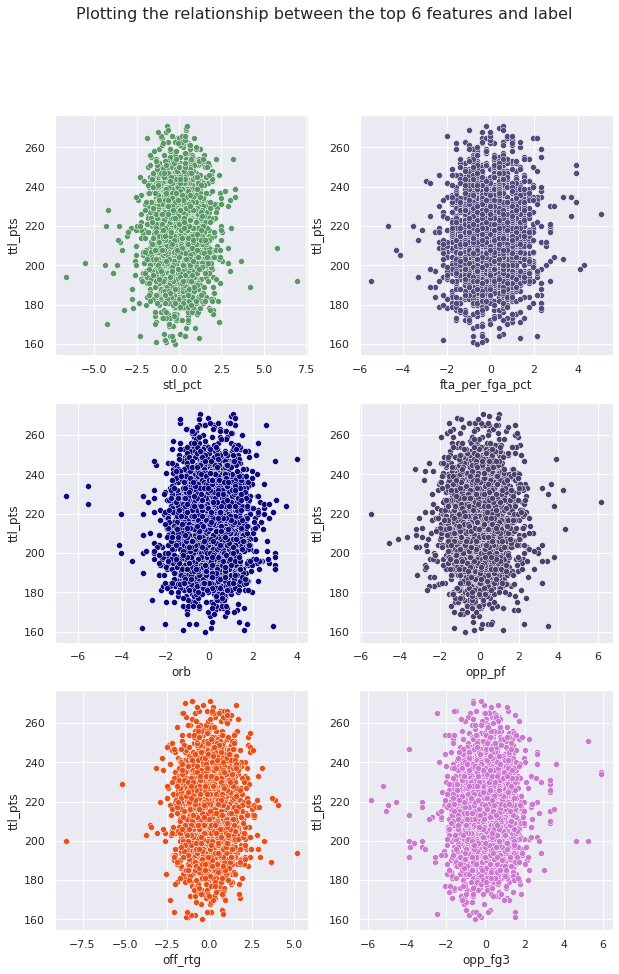

In [156]:
k = 6
selector = SelectKBest(f_regression, k=k)
selector.fit(f_regression_select, column_df_to_row(init_train_label))
features_to_view = f_regression_select.loc[:, selector.get_support()]
fig, axs = plt.subplots(k // 2, 2, figsize=(10, 15))
row_index = 0
column_index = 0
for column in set(features_to_view.columns):
    x = features_to_view[column]
    sns.scatterplot(x=x, y=init_train_label['ttl_pts'], ax = axs[row_index, column_index], color=np.random.rand(3))
    column_index = column_index + 1
    if column_index == 2:
        column_index = 0
        row_index = row_index + 1
fig.suptitle(f"Plotting the relationship between the top {k} features and label", fontsize=16)
plt.show()


# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

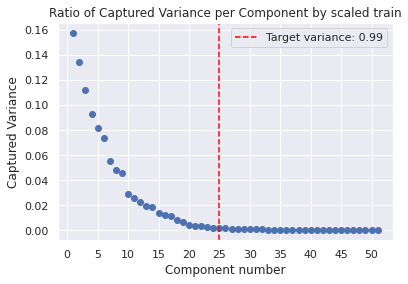

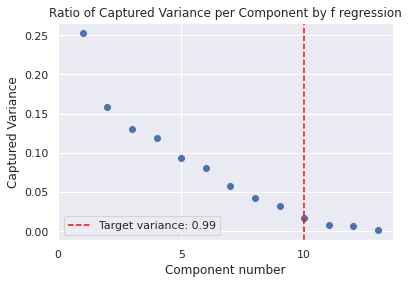

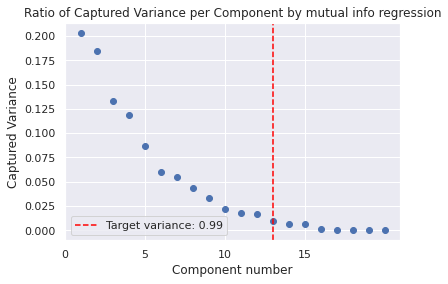

In [114]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, label, max_components=100, target_variance=None):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    
    explained_variance = 0
    component_number = -1
    while target_variance and explained_variance < target_variance:
        component_number += 1
        explained_variance += pca.explained_variance_ratio_[component_number]
    
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    if target_variance:
        plt.axvline(x=component_number, linestyle='--', color='red', label=f"Target variance: {target_variance}")
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
    plt.legend()
    plt.title(f"Ratio of Captured Variance per Component by {label}")
max_components = 20
pca_scree_plot(scaled_train, max_components = 100, label='scaled train', target_variance=.99)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components, label='f regression', target_variance=.99)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components, label='mutual info regression', target_variance=.99)

# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

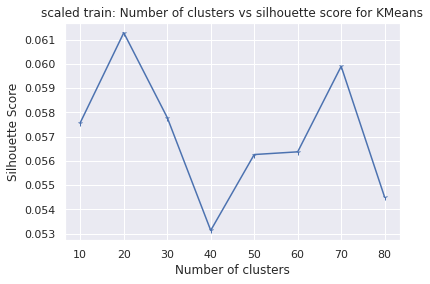

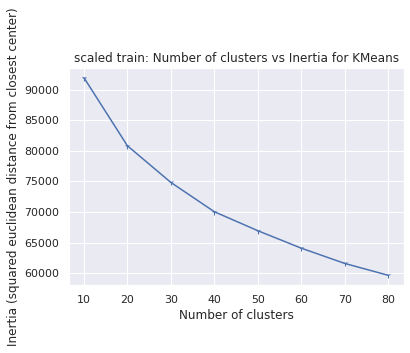

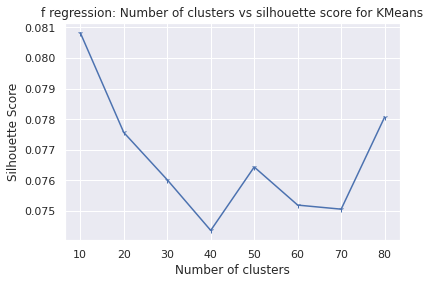

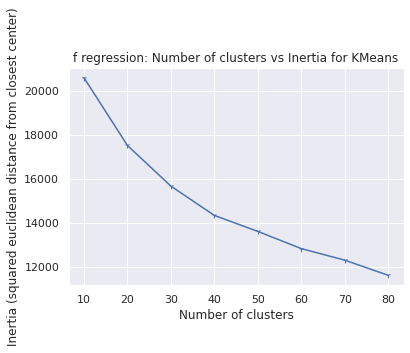

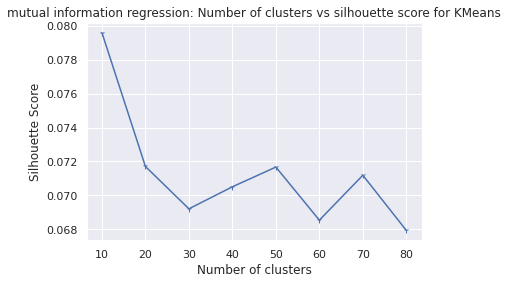

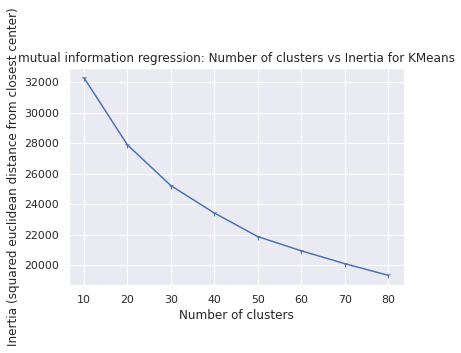

In [115]:
from sklearn.cluster import OPTICS, KMeans
from sklearn.metrics import silhouette_score

datasets = [("scaled train", scaled_train), 
            ("f regression", f_regression_select), 
            ("mutual information regression", mutual_info_regression_select)]
clusters = range(10, 81, 10)
for dataset_name, dataset in datasets:
    scores = []
    inertia = []
    for number_of_clusters in clusters:
        kmeans = KMeans(n_clusters=number_of_clusters)
        labels = kmeans.fit_predict(dataset)
        inertia.append(kmeans.inertia_)
        scores.append(silhouette_score(dataset, labels))
    plt.plot(clusters, scores, marker='1')
    plt.title(f"{dataset_name}: Number of clusters vs silhouette score for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.plot(clusters, inertia, marker='1')
    plt.title(f"{dataset_name}: Number of clusters vs Inertia for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia (squared euclidean distance from closest center)")
    plt.show()
    
        

# Clustering Evaluation
## KMeans
A silhouette score close to 1 is best--they are within the range of \[-1, 1\]. All of the clustering has low silhouette scores, suggesting the clustering is poor. Inertia (loss) starts leveling off, suggesting add more clusters won't improve clustering.